In [ ]:
Load insurance file bulid a good linear regressins 
Data files contains data for differnet weights and other  detail and how much they will be charged for their for their insurance


In [ ]:
1. Loadthe data set into dataframe
2. Find null values and drop the if it is there
3. Do one _hot encoding for categoricoreal feactures
4. clean data with outlier IQR
5. split data into X(independent features) and Y(dependent values)
6. Bulid a simple linear Regressions model and print the residual plot and R2 score sizre 20% test data
7. Find variance inflaction factor and build a new model and note the R2 score and print summary
8. Do ridge and lasso regression and print R2 score for all models
                                                  

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn .model_selection import train_test_split
from statsmodels.api import add_constant, OLS

In [14]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
df.isna().sum()#no.nissingvalues found 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
#using seaborn print Box_polt of dependent variablefor outlier anlaysis 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

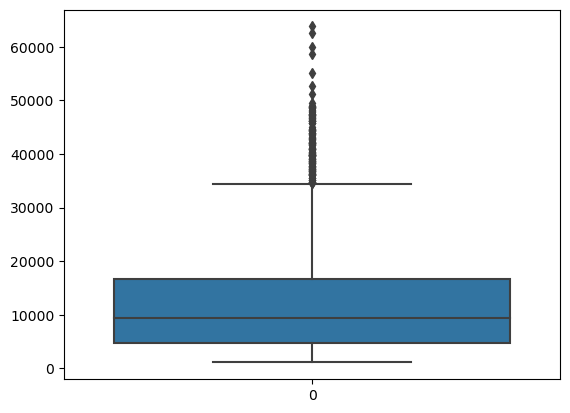

In [21]:
new_df=df.copy() #copy your data to new ddataframeso what ever changes we will make don't 
#affect to original to original
sns.boxplot(new_df['charges'])#depent variable

In [24]:
#outlier treatment using IQR method
hp=sorted(new_df['charges'])
q1,q3=np.percentile(hp,[25,75])
lower_bound=q1-(1.5*(q3-q1))
upper_biund=q3+(1.5*(q3-q1))
below=new_df['charges']>lower_bound
above=new_df['charges']<upper_biund
new_df=new_df[below&above]

In [25]:
new_df.shape

(1199, 7)

In [26]:
new_df.describe()# AS WE can see that in "charges cloumns nax and min values is changes as per  outlier treatments"

,age,bmi,children,charges
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,38.989992,30.095200,1.084237,9927.753402
std,14.068040,6.010551,1.214304,7241.158309
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4408.695900
50%,39.000000,29.735000,1.000000,8410.046850
75%,51.000000,33.820000,2.000000,12953.594600
max,64.000000,53.130000,5.000000,34472.841000


C:\Users\Admin\AppData\Local\Temp\ipykernel_1628\2481178364.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['charges'])#data distribution of dependent variable


<Axes: xlabel='charges', ylabel='Density'>

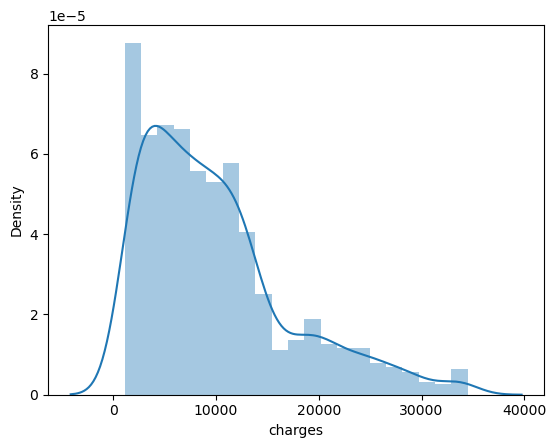

In [30]:
sns.distplot(new_df['charges'])#data distribution of dependent variable

In [32]:
new_df.describe().transpose() # transpose is print fromat horizontal to vertical vertical to horizontal

,count,mean,std,min,25%,50%,75%,max
age,1199.0,38.989992,14.068040,18.0000,26.0000,39.00000,51.0000,64.000
bmi,1199.0,30.095200,6.010551,15.9600,25.8000,29.73500,33.8200,53.130
children,1199.0,1.084237,1.214304,0.0000,0.0000,1.00000,2.0000,5.000
charges,1199.0,9927.753402,7241.158309,1121.8739,4408.6959,8410.04685,12953.5946,34472.841


<Axes: >

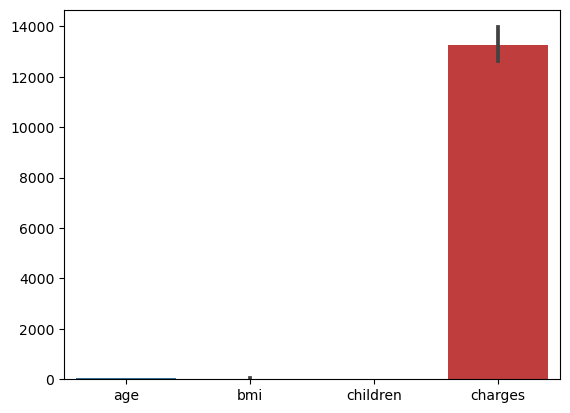

In [44]:
sns.barplot(df )

<Axes: >

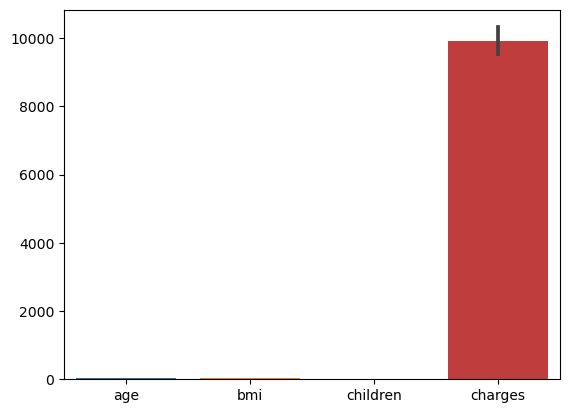

In [40]:
sns.barplot(new_df)

In [45]:
#dummy variable creation
# Lets create dummy variables out of the categorial variables 
fullRaw2=pd.get_dummies (new_df).copy()
print(fullRaw2.shape)
fullRaw2.head()

(1199, 12)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [47]:
fullRaw2.shape

(1199, 12)

In [52]:
x=fullRaw2.drop (['charges'],axis=1).copy()
y=fullRaw2['charges'].copy()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(959, 11)
(240, 11)
(959,)
(240,)


In [54]:
#IMPORTING SKLEARN LIBRARY AND CALL LINEAR REGRESSION THEN FIT ON TRAIN DATA
from sklearn.linear_model import LinearRegression

In [55]:
model=LinearRegression().fit(x_train,y_train)

In [56]:
pred=model.predict(x_test)

In [57]:
score1=model.score(x_test,y_test)#co-efficient of determination (R-square)
score1

0.6192966378869834

In [58]:
#Adiusted RSquare
1-(1-model.score(x_test,y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6009293704166185

Text(0, 0.5, 'residuals')

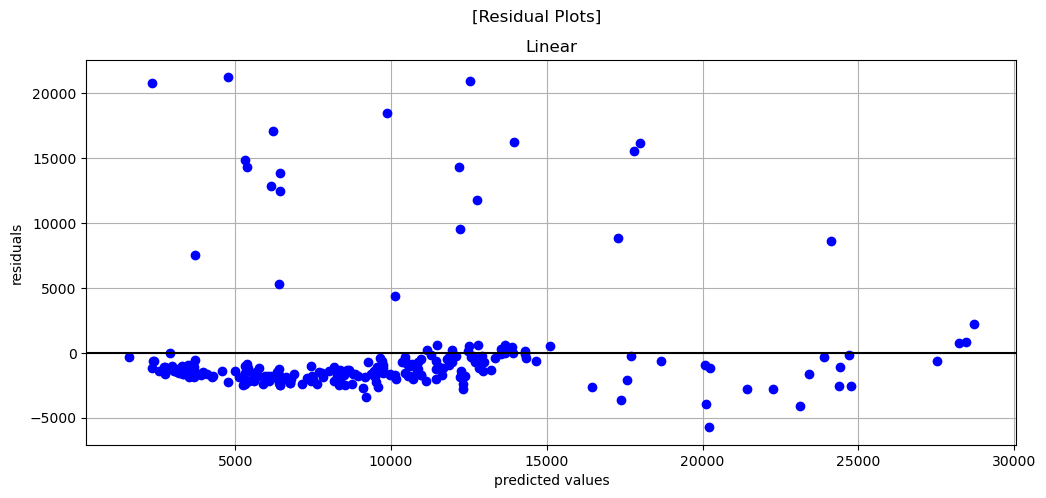

In [60]:
fig,axes=plt.subplots(1,1,sharex=False,sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes.plot(model.predict(x_test),y_test-model.predict(x_test), 'bo')
axes.axhline (y=0,color='k')
axes.grid()
axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1628\3670027512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_linear)


Text(0.5, 1.0, 'Linear')

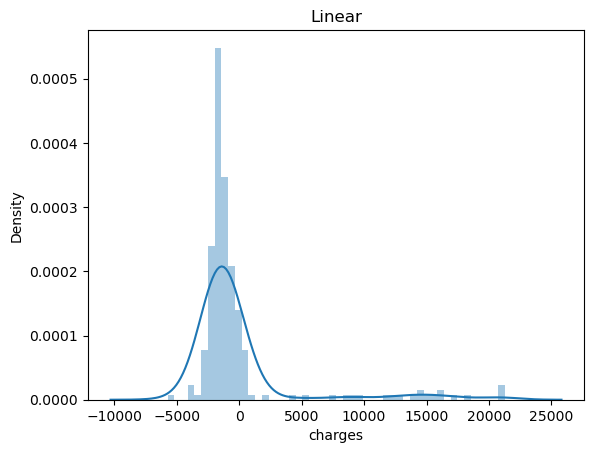

In [62]:
import seaborn as sns 
residuals_linear=y_test-model.predict(x_test)
sns.distplot(residuals_linear)
plt.title('Linear')

<Axes: title={'center': 'Model Coefficients'}>

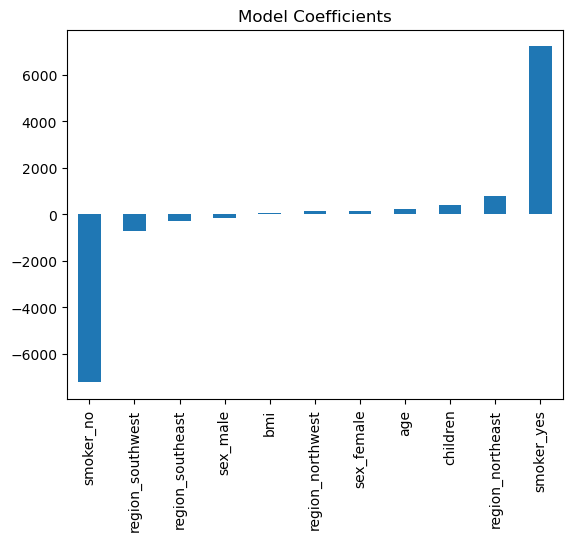

In [64]:
#visualizing model coefficients
predictors=x_train.columns
coef=pd.Series(model.coef_,predictors).sort_values()
coef.plot(kind="bar",title="Model Coefficients")

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif["features"]=x.columns

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [68]:
vif['VIF'] #if hte values is 10 or greater than 10 then its pronlem

0     1.020381
1     1.167918
2     1.003027
3          inf
4          inf
5          inf
6          inf
7          inf
8          inf
9          inf
10         inf
Name: VIF, dtype: float64

In [82]:
x=add_constant(x)
tempMaxVIF=5
maxVIF=5
trainXCopy=x.copy()
counter=1
highVIFColumnsNames=[]
while (tempMaxVIF >=maxVIF):
    #create an empty temporary df to store VIF values 
    tempVIFDF=pd.DataFrame()
    #calculate VIF using list comprehensions
    tempVIFDF['VIF']=[variance_inflation_factor(trainXCopy.values,i)for i in range (trainXCopy.shape[1])]
#create a new colunms 'coloumns name 'to store a columns again the VIF values rom the list omprehenshion 
    tempVIFDF["Column_Name"]=trainXCopy.columns
#Drop na rows from the df -If there is some calculations error resulting inNA's
    tempVIFDF.dropna(inplace=True )
#Sort the df based on VIF values , then pick the top most colunms nmaaaae (which has the highest VIF)
    tempColumnName = tempVIFDF.sort_values (['VIF'])[-1:]['Column_Name'].values[0]
    #store the max VIF value in  tempMAx VIF
    tempMaxVIF=tempVIFDF.sort_values(['VIF'])[-1:]["VIF"].values[0]
    if (tempMaxVIF >=maxVIF):#this condition will ensure that cloumns having VIF lower than 5 are NOT dropped 
        print(counter)
        print(tempColumnName)
        #remove the highest VIF valued "column" from traincopy .As the loop continues this step willkeel removing highestnVIF columns one 
        trainXCopy=trainXCopy.drop(tempColumnName,axis=1)
        highVIFColumnsNames.append (tempColumnName)#here we are making list of deleting variables
        counter=counter+1

  # counter=counter+1


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_i

1
region_southwest
2
smoker_yes
3
sex_male
4
const
5
bmi
6
age


In [93]:
#now we find out  that will coliniarity kick out the columns except const because we wull nees it in future 
#remove all those variables which have high VIF 
print (highVIFColumnsNames)
highVIFColumnsNames.remove('const')#we need toexclude 'const ' clounms from gettiong dropped /remove this is the intercer[t
print(len(highVIFColumnsNames))

x_new =x.drop(highVIFColumnsNames,axis=1)
print(x.shape)


['region_southwest', 'smoker_yes', 'sex_male', 'bmi', 'age']


ValueError: list.remove(x): x not in list

In [92]:
x_new =x.drop(highVIFColumnsNames,axis=1)
print(x.shape)

(1199, 12)


In [95]:
x_new #after removing sone feactures our new idependent feactures are

,const,children,sex_female,smoker_no,region_northeast,region_northwest,region_southeast
0,1.0,0,1,0,0,0,0
1,1.0,1,0,1,0,0,1
2,1.0,3,0,1,0,0,1
3,1.0,0,0,1,0,1,0
4,1.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...
1333,1.0,3,0,1,0,1,0
1334,1.0,0,1,1,1,0,0
1335,1.0,0,1,1,0,0,1
1336,1.0,0,1,1,0,0,0


<Axes: >

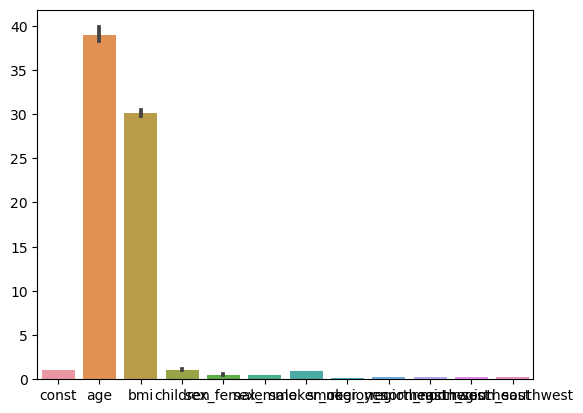

In [96]:
sns.barplot(x)

<Axes: >

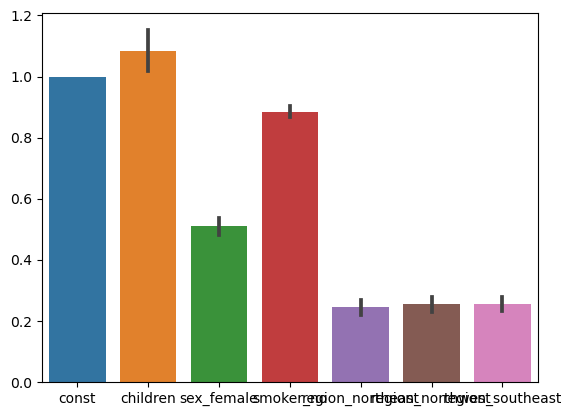

In [97]:
sns.barplot(x_new)

In [102]:
x_train2,x_test,y_train2,y_test2=train_test_split(x_new,y,test_size=0.20,random_state=10)
m1Mode1Def=OLS(y_train2,x_train2) #(Dep_Var,Indep_Vars)#this is model defini.summaryion
m1Mode1Bulid=m1Mode1Def.fit()#this is model building .fit ()creates the linear regressions equations 
m1Mode1Bulid.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     107.2
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          3.90e-103
Time:                        14:39:08   Log-Likelihood:                -9617.1
No. Observations:                 959   AIC:                         1.925e+04
Df Residuals:                     952   BIC:                         1.928e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.098e+04    674.884     31.085      0.000    1.97e+04    2.23e+04
children           534.3608    147.358      3.626      0.000     245.177     823.545
sex_female         205.3767    356.166      0.577      0.564    -493.584     904.338
smoker_no        -1.394e+04    563.985    -24.720      0.000    -1.5e+04   -1.28e+04
region_northeast  1289.8509    511.599      2.521      0.012     285.859    2293.843
region_northwest   885.8797    506.157      1.750      0.080    -107.433    1879.193
region_southeast    93.0997    506.694      0.184      0.854    -901.267    1087.466
==============================================================================
Omnibus:                      235.116   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.871
Skew:                           1.364   Prob(JB):                    6.35e-110
Kurtosis:                       5.267   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
score3=m1Mode1Bulid.rsquared
score3

0.40312380401823755

In [122]:
#Sklearm

In [123]:
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso

In [124]:
#Ridge regression
ridgeReg=Ridge(alpha=0.00001)#, normalize=True)
x3=fullRaw2.drop(['charges'],axis=1).copy()
y3=fullRaw2['charges'].copy()
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,test_size=0.20,random_state=150)

ridgeReg.fit(x_train3,y_train3)
pred=ridgeReg.predict(x_test3)
score4=ridgeReg.score(x_test3,y_test3)

In [125]:
score4

0.6920606871122895

In [126]:
ridgeReg.coef_

array([  248.53710684,    48.03205304,   402.11601549,   136.4257566 ,
        -136.42577047, -7074.51185346,  7074.51168641,   578.94870902,
         505.70608891,  -326.2704559 ,  -758.38437249])

<Axes: title={'center': 'Model Coefficients'}>

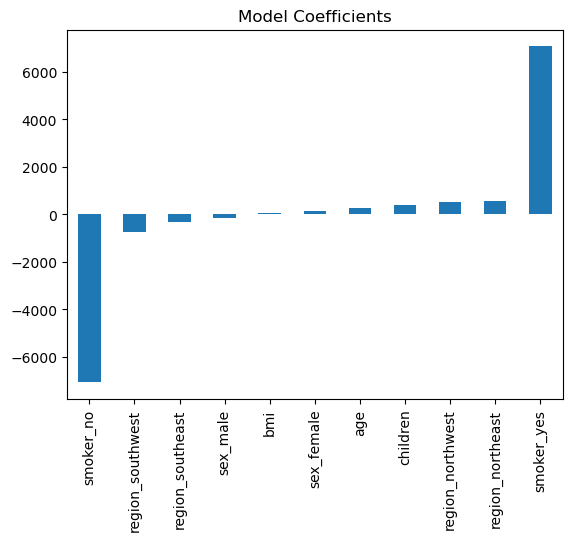

In [127]:
predictors=x_train.columns
coef=pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

In [130]:
#LASSO REGRESSION
LassoReg=Lasso(alpha=0.0001)
LassoReg.fit(x_train3,y_train3)
pred=LassoReg.predict(x_test3)
score5=LassoReg.score(x_test3,y_test3)
score5


0.6920606856065209

In [131]:
LassoReg.coef_

array([ 2.48537106e+02,  4.80320495e+01,  4.02115952e+02,  2.72851125e+02,
       -9.21134662e-14, -1.41490233e+04,  3.26195042e-11,  9.77086191e+02,
        9.03843434e+02,  7.18667251e+01, -3.60246544e+02])

<Axes: title={'center': 'Model Coefficients'}>

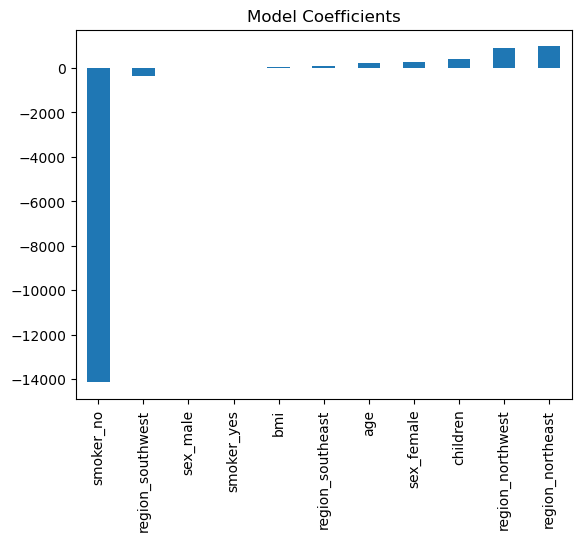

In [134]:
predictors=x_train.columns
coef=pd.Series(LassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

In [135]:
# THATS SHOW FIG WE ARE CREATE A VISUALIZATION WITH THE HELP OF BAR PLOT

In [136]:
print('all models score is:')
print('simple linear regression:'   ,score1)
print ('After VIF  simple linear regression:',score3)
print('ridge regression :',                    score4)
print('Lasso regression:',                     score5)

all models score is:
simple linear regression: 0.6192966378869834
After VIF  simple linear regression: 0.40312380401823755
ridge regression : 0.6920606871122895
Lasso regression: 0.6920606856065209


In [1]:
conclusion:-  we have cleaned the data using different preprocessing technique and built linear regression models

SyntaxError: invalid syntax (507134119.py, line 1)

In [7]:
import pandas as pd
w=pd.read_csv('Bookings.csv')
w

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0


In [8]:
e= pd.read_csv("Sessions.csv")
e

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


In [9]:
e= pd.read_csv("Sessions.csv")
e

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


In [10]:
e= pd.read_csv("Sessions.csv")
e

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


In [11]:
e= pd.read_csv("Sessions.csv")
e

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


In [12]:
w.describe

<bound method NDFrame.describe of       customer_id   booking_id   from_city from_country            to_city  \
0    customer_259   booking_82     Gurgaon        India          Ahmedabad   
1    customer_303  booking_156       Delhi        India           Brussels   
2    customer_203   booking_99  Devanhalli        India  Frankfurt am Main   
3    customer_211  booking_319     Gurgaon        India  Frankfurt am Main   
4    customer_287  booking_222     Gurgaon        India   Roissy-en-France   
..            ...          ...         ...          ...                ...   
334  customer_133  booking_238     Gurgaon        India         Rāja Sānsi   
335  customer_235   booking_37     Gurgaon        India        Bhubaneswar   
336   customer_62  booking_239     Gurgaon        India         Birmingham   
337    customer_5  booking_131      Mumbai        India             Kloten   
338  customer_241  booking_336     Gurgaon        India          Amsterdam   

         to_country          

In [13]:
e.describe

<bound method NDFrame.describe of        session_id    search_id               search_time  \
0     session_322   search_784  2020-01-21T21:35:38.910Z   
1     session_322   search_776  2020-01-21T21:37:37.697Z   
2     session_322   search_623  2020-01-21T21:36:11.392Z   
3     session_322   search_270  2020-01-21T21:16:07.685Z   
4     session_322   search_905  2020-01-21T21:34:55.673Z   
...           ...          ...                       ...   
1492  session_150   search_156  2018-12-18T22:59:43.764Z   
1493  session_120  search_1096      2021-12-23T17:29:37Z   
1494  session_120   search_962      2021-12-23T17:34:39Z   
1495  session_150  search_1306  2018-12-18T22:52:37.654Z   
1496  session_120  search_1180      2021-12-23T17:34:52Z   

         session_starting_time   booking_id  
0         2020-01-21T21:10:12Z          NaN  
1         2020-01-21T21:10:12Z          NaN  
2         2020-01-21T21:10:12Z          NaN  
3         2020-01-21T21:10:12Z          NaN  
4         2020-

In [14]:

w.booking_id.groupby

<bound method Series.groupby of 0       booking_82
1      booking_156
2       booking_99
3      booking_319
4      booking_222
          ...     
334    booking_238
335     booking_37
336    booking_239
337    booking_131
338    booking_336
Name: booking_id, Length: 339, dtype: object>

In [15]:

w.booking_id.groupby

<bound method Series.groupby of 0       booking_82
1      booking_156
2       booking_99
3      booking_319
4      booking_222
          ...     
334    booking_238
335     booking_37
336    booking_239
337    booking_131
338    booking_336
Name: booking_id, Length: 339, dtype: object>

In [16]:
e.session_id
print (e==1)

      session_id  search_id  search_time  session_starting_time  booking_id
0          False      False        False                  False       False
1          False      False        False                  False       False
2          False      False        False                  False       False
3          False      False        False                  False       False
4          False      False        False                  False       False
...          ...        ...          ...                    ...         ...
1492       False      False        False                  False       False
1493       False      False        False                  False       False
1494       False      False        False                  False       False
1495       False      False        False                  False       False
1496       False      False        False                  False       False

[1497 rows x 5 columns]


In [17]:
#How many sessions have more than one booking

In [18]:
distinct_bookings = e['booking_id'].nunique()

# Number of distinct sessions
distinct_sessions = e['session_id'].nunique()

# Number of distinct searches
distinct_searches = e['search_id'].nunique()

# Output results
print(f"Number of distinct bookings: {distinct_bookings}")
print(f"Number of distinct sessions: {distinct_sessions}")
print(f"Number of distinct searches: {distinct_searches}")

Number of distinct bookings: 338
Number of distinct sessions: 331
Number of distinct searches: 1360


In [19]:
e.isnull()



,session_id,search_id,search_time,session_starting_time,booking_id
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
1492,False,False,False,False,False
1493,False,False,False,False,True
1494,False,False,False,False,True
1495,False,False,False,False,True
